In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model

In [5]:
newModel = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
newModel.summary()

for layer in newModel.layers:
    layer.trainable = False

x = Flatten()(newModel.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputs=newModel.input, outputs=x)

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
opt = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss=keras.losses.binary_crossentropy, optimizer=opt, metrics=['accuracy'])

In [9]:
# Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
     r"C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\train",
     target_size = (224,224),
     batch_size =8,
     class_mode ='categorical')

Found 527 images belonging to 2 classes.


In [14]:
validation_generator = test_dataset.flow_from_directory(
    r'C:\Users\pirat\Desktop\cse498r\PNEUMONIA classificatiopn\test',
    target_size = (224,224),
    batch_size = 8,
    class_mode ='categorical')

Found 102 images belonging to 2 classes.


In [15]:
np.random.seed(42)
tf.random.set_seed(42)

hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
)

Epoch 1/10
66/66 [==============================] - 75s 1s/step - loss: 0.5016 - accuracy: 0.8273 - val_loss: 0.4078 - val_accuracy: 0.7843
Epoch 2/10
66/66 [==============================] - 75s 1s/step - loss: 0.4268 - accuracy: 0.8121 - val_loss: 0.4040 - val_accuracy: 0.8039
Epoch 3/10
66/66 [==============================] - 76s 1s/step - loss: 0.3855 - accuracy: 0.8254 - val_loss: 0.3811 - val_accuracy: 0.7941
Epoch 4/10
66/66 [==============================] - 77s 1s/step - loss: 0.3604 - accuracy: 0.8273 - val_loss: 0.6138 - val_accuracy: 0.7843
Epoch 5/10
66/66 [==============================] - 76s 1s/step - loss: 0.3588 - accuracy: 0.8368 - val_loss: 0.4579 - val_accuracy: 0.7843
Epoch 6/10
66/66 [==============================] - 77s 1s/step - loss: 0.3432 - accuracy: 0.8463 - val_loss: 0.5288 - val_accuracy: 0.7843
Epoch 7/10
66/66 [==============================] - 76s 1s/step - loss: 0.3594 - accuracy: 0.8216 - val_loss: 0.4459 - val_accuracy: 0.7941
Epoch 8/10
66/66 [==

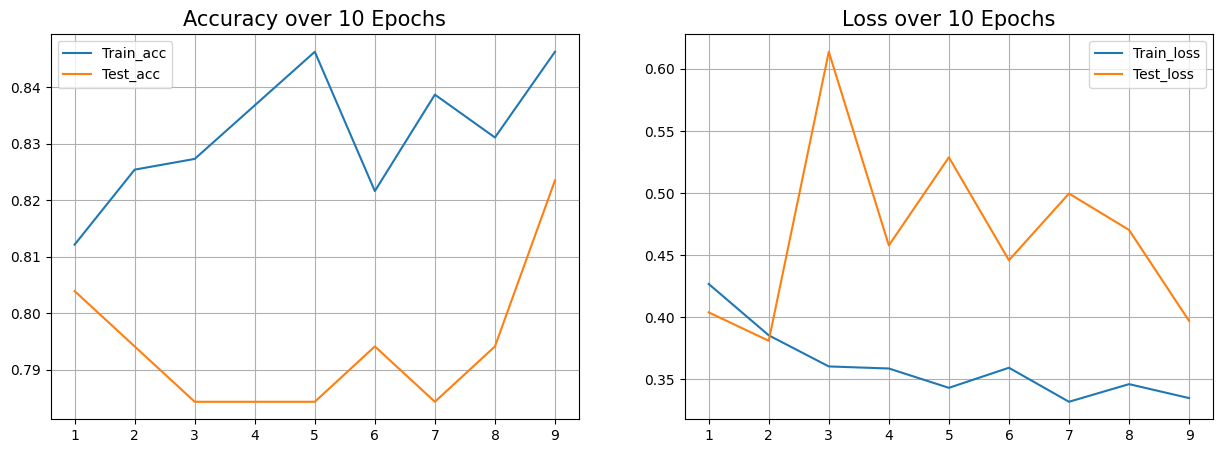

In [16]:
import matplotlib.pyplot as plt
def plot_acc_loss(hist, epochs):
  acc = hist.history['accuracy']
  loss = hist.history['loss']
  val_acc = hist.history['val_accuracy']
  val_loss = hist.history['val_loss']
  plt.figure(figsize=(15, 5))
  plt.subplot(121)
  plt.plot(range(1,epochs), acc[1:], label='Train_acc')
  plt.plot(range(1,epochs), val_acc[1:], label='Test_acc')
  plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
  plt.legend()
  plt.grid(True)
  plt.subplot(122)
  plt.plot(range(1,epochs), loss[1:], label='Train_loss')
  plt.plot(range(1,epochs), val_loss[1:], label='Test_loss')
  plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
  plt.legend()
  plt.grid(True)
  plt.show()
 
plot_acc_loss(hist,10)